## Product Recommendation System
Two kinds of many product recommendation systems are demostrated in this model 
### 1. Recommendation of the most popular product on the site
### 2. Recommendation based on user purchase history of other already bought users

### Most popular product recommendation
**Targeted specifically for new Users**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression


In [81]:
amazon_ratings = pd.read_csv('customers_rating.csv')
amazon_ratings

,Unnamed: 0,UserId,ProductId,Rating,Timestamp
0,0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...,...
99995,99995,A3NCLOCXRJT30Z,B0002VQ0WO,3.0,1260489600
99996,99996,A1LALJTW2NFBH8,B0002VQ0WO,5.0,1393632000
99997,99997,A288BYAMYVWCI1,B0002VQ0WO,4.0,1316736000
99998,99998,A3VH23K0SNNOG9,B0002VQ0WO,2.0,1370390400


In [82]:
amazon_ratings.shape

(100000, 5)

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score
# from sklearn.metrics import mean_squared_error
import numpy as np


In [84]:
encoder = LabelEncoder()
# encoder.fit(df)
amazon_ratings['ProductId'] = encoder.fit_transform(
    amazon_ratings['ProductId'])

print(amazon_ratings)


       Unnamed: 0          UserId  ProductId  Rating   Timestamp
0               0  A39HTATAQ9V7YF          0     5.0  1369699200
1               1  A3JM6GV9MNOF9X          1     3.0  1355443200
2               2  A1Z513UWSAAO0F          1     5.0  1404691200
3               3  A1WMRR494NWEWV          2     4.0  1382572800
4               4  A3IAAVS479H7M7          3     1.0  1274227200
...           ...             ...        ...     ...         ...
99995       99995  A3NCLOCXRJT30Z       6383     3.0  1260489600
99996       99996  A1LALJTW2NFBH8       6383     5.0  1393632000
99997       99997  A288BYAMYVWCI1       6383     4.0  1316736000
99998       99998  A3VH23K0SNNOG9       6383     2.0  1370390400
99999       99999  A1M66CVZVTYWQQ       6383     3.0  1399939200

[100000 rows x 5 columns]


In [85]:
n_bins = 5  # number of bins
amazon_ratings["numeric_category"] = pd.cut(amazon_ratings["Rating"], n_bins, labels=[
                                  "bin1", "bin2", "bin3", "bin4", "bin5"])
amazon_ratings

,Unnamed: 0,UserId,ProductId,Rating,Timestamp,numeric_category
0,0,A39HTATAQ9V7YF,0,5.0,1369699200,bin5
1,1,A3JM6GV9MNOF9X,1,3.0,1355443200,bin3
2,2,A1Z513UWSAAO0F,1,5.0,1404691200,bin5
3,3,A1WMRR494NWEWV,2,4.0,1382572800,bin4
4,4,A3IAAVS479H7M7,3,1.0,1274227200,bin1
...,...,...,...,...,...,...
99995,99995,A3NCLOCXRJT30Z,6383,3.0,1260489600,bin3
99996,99996,A1LALJTW2NFBH8,6383,5.0,1393632000,bin5
99997,99997,A288BYAMYVWCI1,6383,4.0,1316736000,bin4
99998,99998,A3VH23K0SNNOG9,6383,2.0,1370390400,bin2


In [86]:
X=amazon_ratings['ProductId']
Y = amazon_ratings['Rating']

In [87]:
X

0           0
1           1
2           1
3           2
4           3
         ... 
99995    6383
99996    6383
99997    6383
99998    6383
99999    6383
Name: ProductId, Length: 100000, dtype: int32

In [88]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X, Y, test_size=0.8)
X_labeled


69524    4069
79377    4731
48719    2502
63404    3468
1855      538
         ... 
7546      834
97474    6172
19252    1355
40703    2308
5839      791
Name: ProductId, Length: 20000, dtype: int32

In [89]:
clf_model = LogisticRegression(random_state=42)
clf_model.fit(np.array(X_labeled).reshape(-1,1), y_labeled)

LogisticRegression(random_state=42)

In [90]:
y_pred=clf_model.predict(np.array(X_unlabeled).reshape(-1,1))

In [91]:
accuracy = accuracy_score(y_unlabeled,y_pred)
accuracy

0.631975

In [92]:
X = np.concatenate((X_labeled, X_unlabeled))
Y = np.concatenate((y_labeled, y_unlabeled))

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [94]:
clf_model1 = LogisticRegression(random_state=42)
clf_model1.fit(np.array(X_train).reshape(-1,1), y_train)

LogisticRegression(random_state=42)

In [95]:
y_pred=clf_model1.predict(np.array(X_test).reshape(-1,1))

In [96]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6278

In [97]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular

,Rating
ProductId,
2365,2143
2693,1558
4545,1051
5951,1046
3216,845
...,...
2386,1
2387,1
2389,1


<AxesSubplot: xlabel='ProductId'>

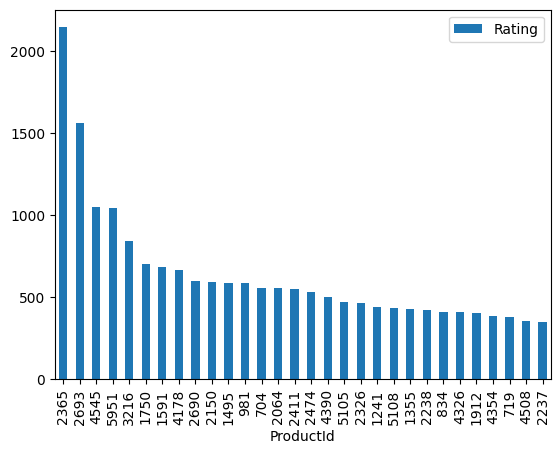

In [98]:
most_popular.head(30).plot(kind = "bar")

### Recommendation based on user purchase history 

**Recommends items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.**

In [99]:
amazon_ratings_subset = amazon_ratings.head(20000)

In [100]:
ratings_utility_matrix = amazon_ratings_subset.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix

ProductId,0,1,2,3,4,5,6,7,8,9,...,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
ratings_utility_matrix.shape

(19101, 1398)

In [102]:
X = ratings_utility_matrix.T
X

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X.shape

(1398, 19101)

Unique products in subset of data

In [104]:
X1 = X
from sklearn.decomposition import TruncatedSVD

In [105]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1398, 10)

In [106]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1398, 1398)

correlation_matrix

### Testing the Model

**Assuming the customer buys any Product (in this case, randomly chosen)**

In [107]:
import random
product_id = X.index[random.randint(0,len(correlation_matrix))]
product_id

1247

In [108]:
product_names = list(X.index)
product_index = product_names.index(product_id)
product_index

1247

In [109]:
correlation_product_ID = correlation_matrix[product_index]

### Recommending top 10 correlated products in order

In [110]:
Recommend_list = list(X.index[correlation_product_ID > 0.90])
Recommend_list.remove(product_id) 

Recommend_list[:10]

[17, 55, 77, 123, 139, 216, 218, 244, 281, 283]